# One vs all heat map

## Imports

In [1]:
import json
import os

import pandas as pd
import seaborn as sb

## Load data

In [2]:
RESULTS_PATH='../../data/baseline/results'

In [6]:
native_test_acc_dict = {}
# Get test accuracy for the LLM the classifier has trained on
for filename in os.listdir(RESULTS_PATH):
    if not filename.endswith('.json') or filename.startswith('one_vs_all'):
        continue
    filepath = os.path.join(RESULTS_PATH, filename)
    with open(filepath, 'r') as file:
        data = json.load(file)
        last_test_acc = data['test_acc'][-1]
        # Use the filename without the .json extension as the key
        key = os.path.splitext(filename)[0]
        native_test_acc_dict[key] = last_test_acc

data = None
with open(f'{RESULTS_PATH}/one_vs_all.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

{'alpaca-7b': 94.4515306122449, 'bigscience-bloomz-7b1': 83.97108843537414, 'chavinlo-alpaca-13b': 96.08843537414967, 'gemini-pro': 93.47363945578232, 'gpt-3.5-turbo-0125': 91.87925170068027, 'gpt-4-turbo-preview': 98.21428571428571, 'meta-llama-llama-2-70b-chat-hf': 95.93962585034014, 'meta-llama-llama-2-7b-chat-hf': 91.77295918367346, 'mistralai-mistral-7b-instruct-v0.2': 90.77380952380952, 'mistralai-mixtral-8x7b-instruct-v0.1': 91.36904761904762, 'qwen-qwen1.5-72b-chat-8bit': 95.49319727891157, 'text-bison-002': 93.70748299319727, 'vicgalle-gpt2-open-instruct-v1': 84.09863945578232}


## Plot heat map

In [17]:
# 14 LLMs 
# 14x15 matrix; each row displays the accuracy of a classifier trained on one LLM and tested on the other LLM test sets, as well as the human test set
# The LLMs should be sorted for each row, so we get a classifier trained on LLM X's performance on X's test data at the diagonal square 
# (the diagonal goes from (1,1) to (14,14), as we don't train a classifier on human data only)
def plot_heat_map(data, native_test_acc_dict):
    heatmap_data = []

    for item in data:
        base_model = item['base_model']
        results = {}
        results['base_model'] = base_model
        results[base_model] = native_test_acc_dict[base_model]
        
        for result in item['results_against_all_llms']:
            for model_name, model_data in result.items():
                results[model_name] = model_data['vs_full_test_set']['test_acc']
        
        heatmap_data.append(results)
    
    # Create DataFrame
    df = pd.DataFrame(heatmap_data)
    df.set_index('base_model', inplace=True)
    df = df.sort_index(axis=1)
    
    ax = sb.heatmap(df, annot=True, cmap='coolwarm', cbar_kws={'label': 'Accuracy in %'}, )
    ax.set(xlabel="", ylabel="")

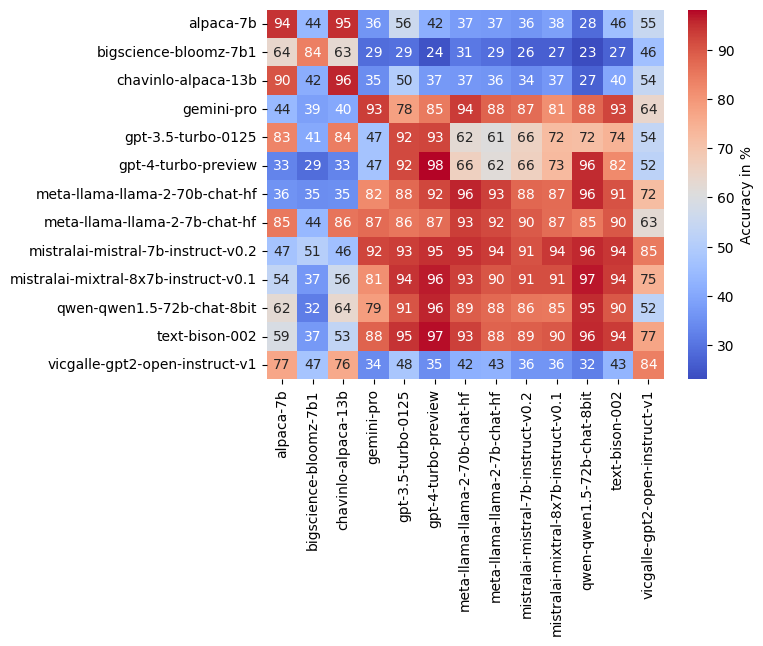

In [18]:
plot_heat_map(data, native_test_acc_dict)